Attribute Information:
------------------------
The dataset includes 9 columns with information on 800 people.
1.	age : in years
2.	weight : body weight in pounds (lbs)
3.	bmi : Body Mass Index (weight in kg/(height in m)2)
4.	blood_pressure : resting blood pressure (mm Hg)
5.	insulin_test : inuslin test value
6.	liver_stress_test : liver_stress_test value
7.	cardio_stress_test : cardio_stress_test value
8.	years_smoking : number of years of smoking
9.	zeta_disease :
              1 = yes;
              0 = no

In [1]:
# Basic Libraries for Data organization, Statistical operations and Plotting
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import missingno as msno # Missing Data visualization
import seaborn as sns
from statistics import mean, stdev
sns.set(style="white")
# Pretty display for notebooks
%matplotlib inline     

# other library
import time

### Machine learning
## preprocess

from datetime import datetime
from sklearn import metrics
from sklearn.metrics import classification_report     
from sklearn.metrics import confusion_matrix     
from sklearn.preprocessing import StandardScaler  # Helps us in Standardizing the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score,precision_score

# Oversampling
from imblearn.over_sampling import SMOTE 

# ignore sys warning
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
# Load Dataset
def load_data(filename):
    df_data = pd.read_csv(filename)
    return df_data
# Reading training data using pandas for excel

# Drop columns
def drop_cols(df, del_cols):   
    for col in (set(del_cols) & set(df.columns)):
        df = df.drop([col], axis=1)
    return df

In [3]:
dataset = load_data('train_data.csv')

In [4]:
# Generating dataset profile
pandas_profiling.ProfileReport(dataset)   

In [5]:
dataset.head(5) #Checking First five rows

age  weight   bmi  blood_pressure  insulin_test  liver_stress_test  \
0   54     189  27.1              80             0             1.5038   
1   23     150  38.5              68            71             0.3868   
2   47     186  29.9              90             0             0.2728   
3   18     150  30.8              70          1033             0.6598   
4   24     160  32.4              74           125             0.7608   

   cardio_stress_test  years_smoking  zeta_disease  
0                   0             10             0  
1                  55              2             0  
2                   0              7             0  
3                  56              0             0  
4                  59              2             0

In [6]:
dataset.tail(5) #Checking Last five rows

age  weight   bmi  blood_pressure  insulin_test  liver_stress_test  \
795   26     161  28.4              90            78             0.5578   
796   37     165  33.7              60             0             0.3078   
797   27     166  25.6              74             0             0.2638   
798  109     139  28.1              66            94             0.2298   
799   26     196  29.7              56             0             0.6268   

     cardio_stress_test  years_smoking  zeta_disease  
795                  42              3             0  
796                  69              6             1  
797                   0              5             0  
798                  53              1             0  
799                   0              1             0

In [7]:
#numbers of rows and columns in given dataset
print("Dataset has {} data points with {} variables each.".format(*dataset.shape))

Dataset has 800 data points with 9 variables each.


In [8]:
 #printing column names in given data set
pd.DataFrame(list(dataset.columns.values),columns=['Columns'])    

Columns
0                 age
1              weight
2                 bmi
3      blood_pressure
4        insulin_test
5   liver_stress_test
6  cardio_stress_test
7       years_smoking
8        zeta_disease

In [9]:
#Checking salesman data info
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [10]:
#basic statistical details like percentile, mean, std etc
dataset.describe(include='all')

age      weight         bmi  blood_pressure  insulin_test  \
count  800.000000  800.000000  800.000000      800.000000    800.000000   
mean    30.985000  172.407500   32.201625       69.565000     85.887500   
std     13.824025   31.942438    8.549155       19.874784    126.333656   
min     18.000000   94.000000    0.000000        0.000000      0.000000   
25%     21.000000  149.000000   27.300000       62.000000      0.000000   
50%     26.000000  167.000000   32.050000       72.000000     45.000000   
75%     38.000000  192.000000   36.525000       80.000000    130.000000   
max    109.000000  308.000000   86.100000      157.000000   1077.000000   

       liver_stress_test  cardio_stress_test  years_smoking  zeta_disease  
count         800.000000          800.000000     800.000000    800.000000  
mean            0.544496           43.121250       4.051250      0.348750  
std             0.348711           30.409949       4.176173      0.476873  
min             0.140800            0.000000       0.000000      0.000000  
25%             0.307800            0.000000       1.000000      0.000000  
50%             0.445300           53.000000       3.000000      0.000000  
75%             0.699800           62.000000       6.000000      1.000000  
max             3.481300          214.000000      40.000000      1.000000

In [11]:
#Checking the data type of each column

pd.DataFrame(dataset.dtypes,columns=['Features'])

Features
age                   int64
weight                int64
bmi                 float64
blood_pressure        int64
insulin_test          int64
liver_stress_test   float64
cardio_stress_test    int64
years_smoking         int64
zeta_disease          int64

In [12]:
# class distribution
print(dataset.groupby('zeta_disease').size())

zeta_disease
0    521
1    279
dtype: int64


In [13]:
def bar_horizantal_plots(df,col):
    plt.figure(figsize=(16,6))
    df.sort_values([col], ascending=False).head(10).plot(kind="barh")
    return plt.show()

<Figure size 1152x432 with 0 Axes>

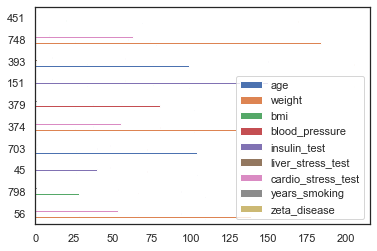

In [14]:
bar_horizantal_plots(dataset,"age")

In [15]:
# Checking the missing values by using MSNO plot
def missing_Values(df):
    plt.figure(figsize=(16,6))
    msno.matrix(df,labels=True,color=(0.20,0.20,0.20))    
    for c in df.columns:
        miss = df[c].isnull().sum()
        if miss>0:
            print("{} has {} missing value(s)".format(c,miss))
        else:
            print("{} has NO missing value!".format(c))
    return plt.show()  

age has NO missing value!
weight has NO missing value!
bmi has NO missing value!
blood_pressure has NO missing value!
insulin_test has NO missing value!
liver_stress_test has NO missing value!
cardio_stress_test has NO missing value!
years_smoking has NO missing value!
zeta_disease has NO missing value!


<Figure size 1152x432 with 0 Axes>

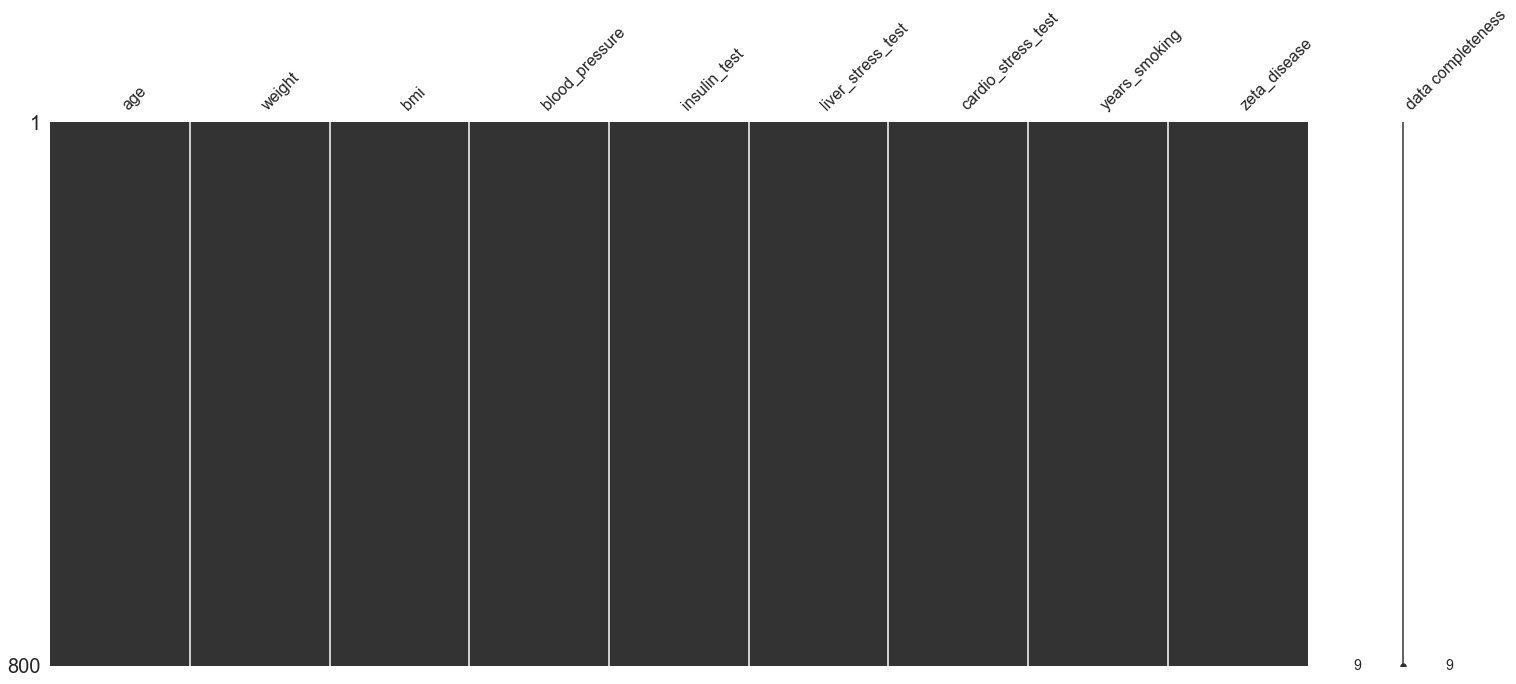

In [16]:
missing_Values(dataset)

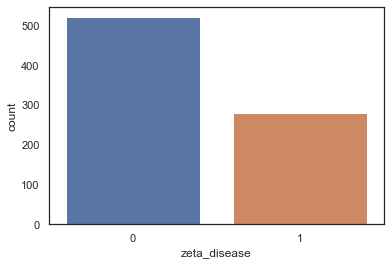

In [17]:
# Counter plot for "zeta_disease" value
sns.countplot(x='zeta_disease',data=dataset);

In [18]:
# Funcation for generating heat map
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

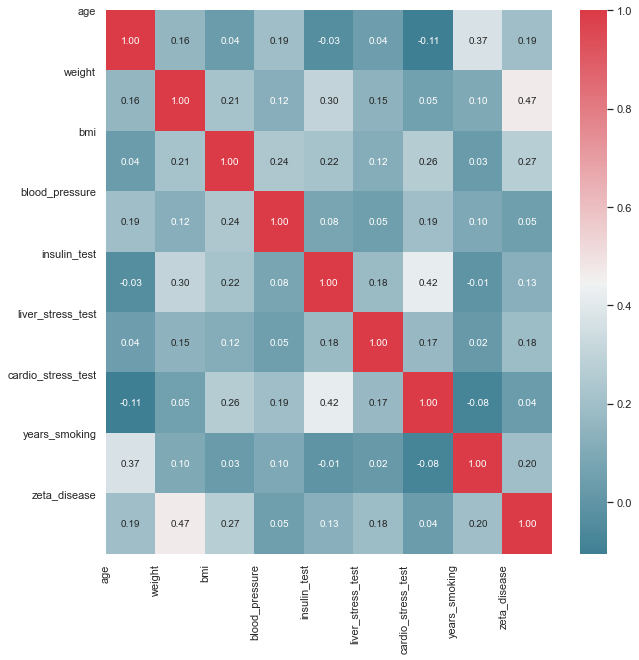

In [19]:
# Let's analyze correlations among features
heatMap(dataset)

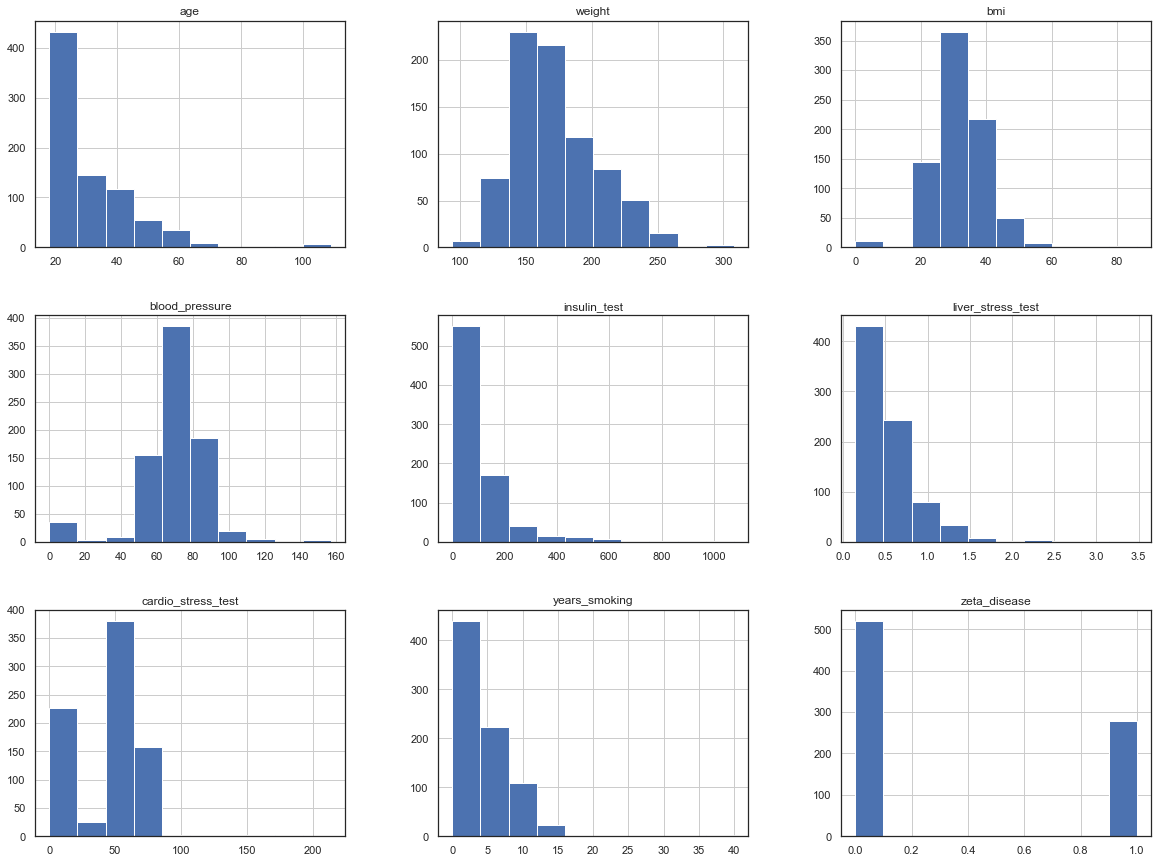

In [20]:
# Histogram for checking outliers

dataset.hist(figsize=(20,15))
plt.show()

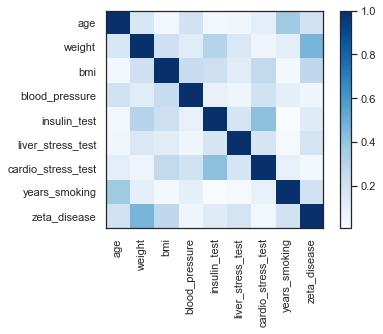

Most Correlated:


[('age', 'years_smoking', 0.37237265974016176),
 ('cardio_stress_test', 'insulin_test', 0.41789374848695005),
 ('zeta_disease', 'weight', 0.4711547335231003)]

Least Correlated:


[('years_smoking', 'insulin_test', -0.006292056451155412),
 ('liver_stress_test', 'years_smoking', 0.02181739642506877),
 ('years_smoking', 'bmi', 0.028683273843019372)]

In [21]:
# Correlation matrix indetail

#Correlation matrix
def correlation_matrix_from(dataframe):
    return np.corrcoef(dataframe, rowvar=False)

def corr_plot(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)
    
    plt.imshow(np.abs(corr_matrix), cmap=plt.cm.Blues, interpolation='nearest')
    plt.xticks(range(size), dataframe.columns, rotation=90)
    plt.yticks(range(size), dataframe.columns)
    plt.colorbar()
    plt.show()

def least_to_most(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)
    
    def sort_correlations():
        abs_corr_matrix = np.abs(corr_matrix)
        arg_sorted = np.argsort(abs_corr_matrix, axis=None)[:-size:2]  # Remove diagonals
        ix, iy = np.unravel_index(arg_sorted, abs_corr_matrix.shape)
        return ix, iy, corr_matrix.ravel()[arg_sorted]
    
    f1, f2, vals = sort_correlations()
    return list(zip(dataframe.columns[f1], dataframe.columns[f2], vals))


corr_plot(dataset)
ordered_correlations = least_to_most(dataset)

print("Most Correlated:")
display(ordered_correlations[-3:])

print("Least Correlated:")
display(ordered_correlations[:3])


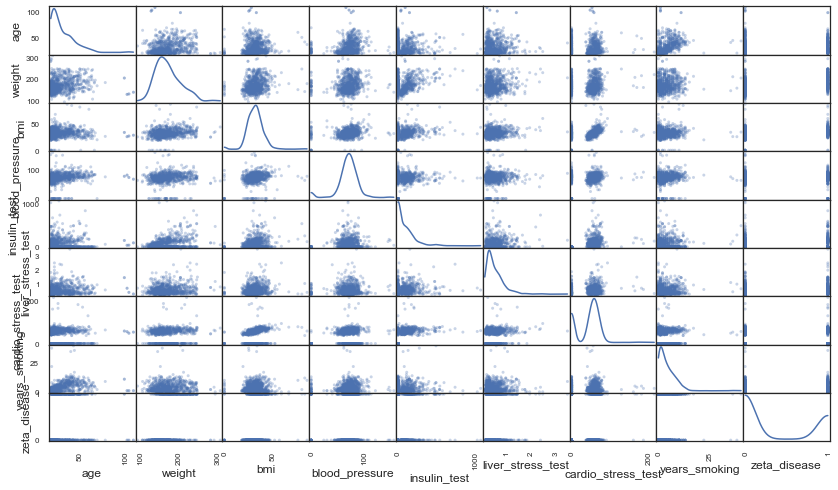

In [22]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [23]:
# Function to split the dataset 
def splitdataset(data): 
  
    # Seperating the target variable 
    X = dataset.iloc[:, 0:8] 
    y = dataset.iloc[:,8] 
  
    # Spliting the dataset into train and test 
    X_train, X_val, y_train, y_val = train_test_split(  
    X, y, test_size = 0.3, random_state = 100,stratify=y) 
      
    return X_train, X_val, y_train, y_val 

In [24]:
# Storing X_train, X_val, y_train, y_val
X_train, X_val, y_train, y_val =splitdataset(dataset)

In [25]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(560, 8)
(240, 8)
(560,)
(240,)


In [26]:
X_train.head()

age  weight   bmi  blood_pressure  insulin_test  liver_stress_test  \
34    31     173  32.0             148           176             0.5058   
616   42     155  43.3             100             0             0.3018   
72    31     174  35.4              70           402             0.3448   
49    29     179  36.4              92           155             1.0308   
186   22     194  31.6              58           135             0.4848   

     cardio_stress_test  years_smoking  
34                   45              4  
616                  66              8  
72                   63              9  
49                   79              3  
186                  63              2

In [27]:
y_train.head()

34     0
616    1
72     0
49     1
186    1
Name: zeta_disease, dtype: int64

In [28]:
# Lets check the imbalance first
print('The Imbalance is: {}'.format(np.unique(y_train, return_counts=True)[1][1] / 
                                    (float(np.unique(y_train, return_counts=True)[1][0]) + 
                                    np.unique(y_train, return_counts=True)[1][1])*100))

The Imbalance is: 34.82142857142857


In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 365 



In [30]:
def makeOverSamples(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import RandomOverSampler
 oversample = RandomOverSampler(sampling_strategy='minority')
 X, y = oversample.fit_resample(X,y)
 return X,y

In [31]:
# OverSampling for Minority Classs
X_train, y_train=makeOverSamples(X_train,y_train)

In [32]:
# Lets check the imbalance first
print('The Imbalance is reduced now and stands at: {}'.format(np.unique(y_train, return_counts=True)[1][1] / 
                                    (float(np.unique(y_train, return_counts=True)[1][0]) + 
                                    np.unique(y_train, return_counts=True)[1][1])*100))

The Imbalance is reduced now and stands at: 50.0


In [33]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

After OverSampling, counts of label '1': 365
After OverSampling, counts of label '0': 365 



In [34]:
# Standarizing  X_Train and y_train
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train=s.fit_transform(X_train)
X_val=s.transform(X_val)

### Lets apply different machine learning models

1. Logistic Regression
2. SVM
3. Random Forests
4. Decision Tree
5. Navie Baye's
6. KNeighborsClassifier
7. AdaBoost
8. XGBoost

#### Creating Instances

In [35]:
# Lets stick to default Hyperparametrs as of now. We shall tune the best model
log_reg = LogisticRegression(random_state= 42)
svc = SVC(random_state= 42,gamma='auto',probability=True)
rf = RandomForestClassifier(random_state= 42,n_estimators = 100)
ada = AdaBoostClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42)
dt=DecisionTreeClassifier(criterion = "gini",random_state = 42)
bc = BaggingClassifier(base_estimator=dt, random_state=42)
vc = VotingClassifier(estimators=[('LogisticRegresion', log_reg), ('RandomForest',rf), ('SupportVectorMachine', svc),('AdaBoost',ada),('XGBClassifier',xgb),('DecisionTree',dt)],voting='soft')


In [36]:
# Predict function
def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts  
    scores['Accuracy_test'] = accuracy_score(Y_test , Y_pred)    
    scores['Recall_test'] = recall_score(Y_test , Y_pred,average='macro')    
    scores['Precision_test'] = precision_score(Y_test , Y_pred,average='macro')    
    return scores

In [37]:
# Ignore the error
start = time.time()
predictors = {} # Initializing a dictionary to store training and testing data
for model in [log_reg, svc, rf,dt,ada, xgb,bc,vc]: # these are our objects that we instantiated above. We loop through them
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    predictors[model_name] =  training_predict(model, X_train, y_train, X_val, y_val)#Scores that is returned from trainer goes to
                                                                             # the respective predictor   print('Loop Ended at {}'.format(datetime.now().strftime("%H:%M:%S")))
print('\n')    
print('Loop took {} mins'.format((time.time() - start) / 60))     

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Loop took 0.049674618244171145 mins


In [38]:
pd.DataFrame(predictors).T

Accuracy_test  Recall_test  Precision_test
LogisticRegression           0.745833     0.735806        0.724319
SVC                          0.733333     0.734432        0.717195
RandomForestClassifier       0.800000     0.771978        0.782051
DecisionTreeClassifier       0.725000     0.697802        0.697802
AdaBoostClassifier           0.820833     0.809982        0.802255
XGBClassifier                0.762500     0.723901        0.740669
BaggingClassifier            0.808333     0.761905        0.804688
VotingClassifier             0.783333     0.761905        0.761905

#### PreTune with Default parameter

In [39]:
# create Decision tree Classifier        
rc = RandomForestClassifier()
bc = BaggingClassifier(base_estimator=rc, oob_score=True, random_state=1)

In [40]:
bc.fit(X_train,y_train)
Train=bc.score(X_train,y_train)
print("Training score:{} ".format(Train))
Test=bc.score(X_val,y_val)
print("Test score:{} ".format(Test))
print("-"*35)
print("Accuracy:",metrics.accuracy_score(y_train, bc.predict(X_train)))
print("Precision:",metrics.precision_score(y_train, bc.predict(X_train),average='macro')) 
print("Recall:",metrics.recall_score(y_train, bc.predict(X_train),average='macro')) 
print("F1 score:",metrics.f1_score(y_train,bc.predict(X_train),average='macro'))
print("-"*35,"\n")
print("Classification Report for Train","\n",classification_report(y_train,bc.predict(X_train)))
print("-"*35,"\n")
print("Classification Report for Test","\n",classification_report(y_val,bc.predict(X_val)))

C:\Users\manju\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\manju\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


Training score:0.9753424657534246 
Test score:0.7833333333333333 
-----------------------------------
Accuracy: 0.9753424657534246
Precision: 0.9755709254211068
Recall: 0.9753424657534246
F1 score: 0.9753395040875616
----------------------------------- 

Classification Report for Train 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       365
           1       0.97      0.99      0.98       365

    accuracy                           0.98       730
   macro avg       0.98      0.98      0.98       730
weighted avg       0.98      0.98      0.98       730

----------------------------------- 

Classification Report for Test 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       156
           1       0.69      0.69      0.69        84

    accuracy                           0.78       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.78      0.78      0.

#### PostTune with Best parameters

In [41]:
# Initializing a dictionary to store parameters
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6],
                  'base_estimator__criterion':['entropy','gini'],'base_estimator__max_features': ['auto']}

# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='f1_macro', cv=5, n_jobs=-1)
bc_grid.fit(X_train,y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 6, 'base_estimator__max_features': 'auto', 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


In [42]:
final_rc = RandomForestClassifier(max_leaf_nodes=15, max_depth=6)                   
final_bc = BaggingClassifier(base_estimator=final_rc, n_estimators=42, random_state=1)
final_bc.fit(X_train,y_train)
final_preds = final_bc.predict(X_val)

#### Learning curve

In [43]:
from sklearn.model_selection import learning_curve
# Seperating the target variable 
X = dataset.iloc[:, 0:8] 
y = dataset.iloc[:,8]   

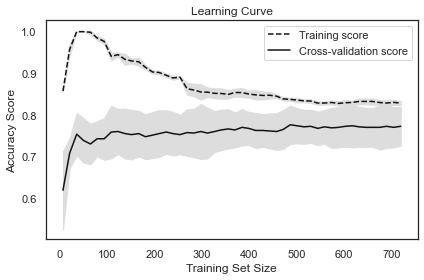

In [44]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(final_bc, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [53]:
sub=pd.read_csv("submission.csv")
sub.head()

age  weight   bmi  blood_pressure  insulin_test  liver_stress_test  \
0   24     151  39.5              69            72             1.3968   
1   27     179  35.5              89           156             1.6608   
2   34     147  26.9              76            74             1.6958   
3   35     206  32.4              73           127             1.4608   
4   60     193  29.8              62           192             1.7798   

   cardio_stress_test  years_smoking  zeta_disease  
0                  56              4             1  
1                  43              6             1  
2                  53              2             1  
3                  61              6             1  
4                  65              9             1

In [54]:
df_sub=sub.iloc[:,0:8]
df_sub

age  weight   bmi  blood_pressure  insulin_test  liver_stress_test  \
0    24     151  39.5              69            72             1.3968   
1    27     179  35.5              89           156             1.6608   
2    34     147  26.9              76            74             1.6958   
3    35     206  32.4              73           127             1.4608   
4    60     193  29.8              62           192             1.7798   
5    45     120  36.5             108            50             1.2978   
6    20     139  38.2              61            77             1.5818   
7    23     137  31.2              70            73             1.4168   
8    36     195  30.5              59           141             1.4498   
9    19     193  25.8              84            66             1.7938   
10   47     216  34.7              70           170             1.7238   
11   40     200  30.4              69           128             1.3118   
12   21     154  46.5              88           121             1.2498   
13   52     196  31.3              90           167             1.9238   
14   30     181  37.4              93           157             2.0508   
15   46     213  26.5              70           133             1.4788   
16   29     173  50.7              91           221             1.4878   
17   36     202  42.8              72           273             1.8748   
18   27     197  29.1              72           362             1.4298   
19   44     184  33.9             104           141             1.3268   

    cardio_stress_test  years_smoking  
0                   56              4  
1                   43              6  
2                   53              2  
3                   61              6  
4                   65              9  
5                   54             12  
6                   68              3  
7                   59              7  
8                   59              6  
9                   50              3  
10                  58              7  
11                  60              3  
12                  68              4  
13                  66             10  
14                  80              5  
15                  55             12  
16                  83              3  
17                  72             13  
18                  69              4  
19                  60              2

In [55]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df_sub_pred=s.fit_transform(df_sub)

In [56]:
df_sub_pred = final_bc.predict(df_sub) 

In [57]:
df_sub_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [58]:
sub["zeta_disease"]=df_sub_pred

In [59]:
sub.to_csv("submission.csv",index=False)